In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from scipy.optimize import curve_fit

In [140]:
filepath = "./Dataset/"
totalvACT_df = pd.read_csv(filepath + "Total_vehicles_registered_in_the_ACT.csv")
totalvACT_df.head()

,Date,Vehicle body type,Motive power,Count
0,2015-07-01,AMBULANCE,Diesel,1
1,2015-07-01,AMBULANCE,Diesel,33
2,2015-07-01,ARMOURED VEHICLE,Diesel,1
3,2015-07-01,ARMOURED VEHICLE,Diesel,4
4,2015-07-01,ARMOURED VEHICLE,Diesel,8


In [142]:
totalvACT_clear = totalvACT_df.loc[(totalvACT_df["Vehicle body type"] == "SEDAN") &
                                    ((totalvACT_df["Motive power"] == "Diesel") |
                                    (totalvACT_df["Motive power"] == "Petrol") |
                                    (totalvACT_df["Motive power"] == "Electric"))]
totalvACT_clear["Year"] = pd.DatetimeIndex(totalvACT_clear.loc[:,"Date"]).year
totalvACT_clear = totalvACT_clear[["Year","Motive power","Count"]]
totalvACT_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2135 entries, 256 to 34830
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          2135 non-null   int64 
 1   Motive power  2135 non-null   object
 2   Count         2135 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 66.7+ KB


c:\Users\zhaoj\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


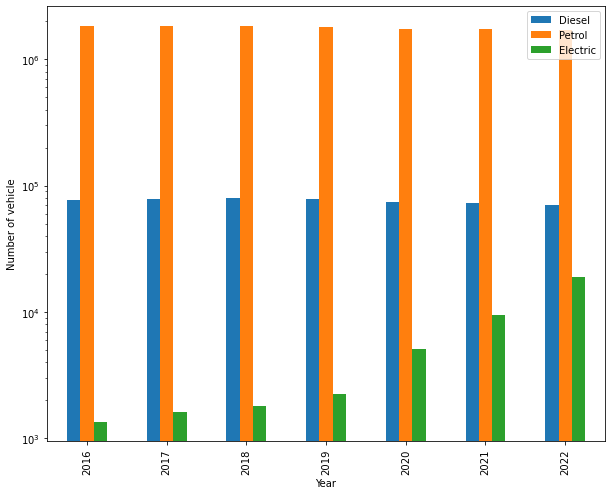

In [143]:
totalvACT_clear_grp = totalvACT_clear.groupby(["Year","Motive power"])
totalvACT_clear_df = totalvACT_clear_grp["Count"].sum().reset_index(["Motive power"])
year = [2015,2016,2017,2018,2019,2020,2021,2022]
Diesel_ser = totalvACT_clear_df.loc[totalvACT_clear_df["Motive power"] == "Diesel"]["Count"]
Petrol_ser = totalvACT_clear_df.loc[totalvACT_clear_df["Motive power"] == "Petrol"]["Count"]
Electric_ser = totalvACT_clear_df.loc[totalvACT_clear_df["Motive power"] == "Electric"]["Count"]
barchart_df = pd.DataFrame({"Diesel":Diesel_ser,
                            "Petrol":Petrol_ser,
                            "Electric":Electric_ser},
                            index=year)
# barchart = barchart_df.plot(kind="bar",figsize=(10,8))
# barchart.set_xlabel("Year")
# barchart.set_ylabel("Number of vehicle")
barchart_df.head()

# found out 2015 is this outlier, could be half year data
barchart_df = barchart_df.iloc[1:]
barchart = barchart_df.plot(kind="bar",figsize=(10,8))
barchart.set_xlabel("Year")
barchart.set_ylabel("Number of vehicle")
barchart.set_yscale("log")
plt.show()


In [100]:
def expfunc(x, a,b ):
    return a*np.exp(b *x)

def logfunc(x, a,b,c ):
    return a*np.log(b+x)+c

c:\Users\zhaoj\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\Users\zhaoj\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


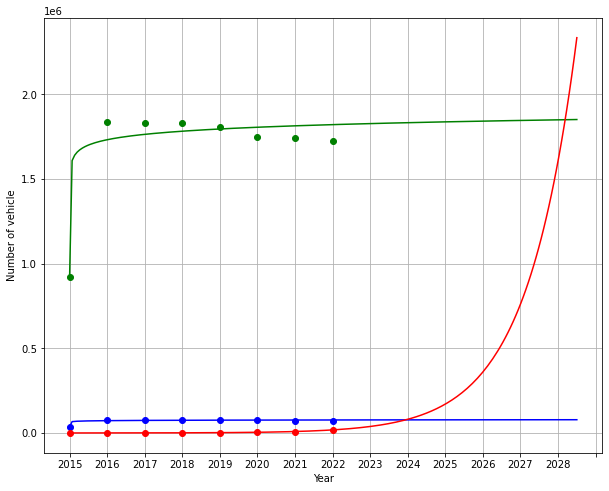

In [19]:
x = range(1,8)
x_fitted = np.linspace(np.min(x), np.max(x)+6.5, 200)
plt.figure(figsize=(10,8))

# Petrol
y1 = barchart_df["Petrol"]
popt1, pcov1 = curve_fit(logfunc, x, y1, maxfev=1000)
plt.plot(x, y1, 'go', label="Petrol")
y_fitted1 = logfunc(x_fitted, *popt1)
plt.plot(x_fitted, y_fitted1, 'g-', label="Petrol Fitted Curve")

# Diesel
y2 = barchart_df["Diesel"]
popt2, pcov2 = curve_fit(logfunc, x, y2, maxfev=1000)
plt.plot(x, y2, 'bo', label="Diesel")
y_fitted2 = logfunc(x_fitted, *popt2)
plt.plot(x_fitted, y_fitted2, 'b-', label="Fitted Curve")

# Electric
y3 = barchart_df["Electric"]
popt, pcov = curve_fit(expfunc, x, y3, maxfev=1000)
plt.plot(x, y3, 'ro', label="Electric")
y_fitted = expfunc(x_fitted, *popt)
plt.plot(x_fitted, y_fitted, 'r-', label="Fitted Curve")

plt.grid()
plt.xlabel('Year')
plt.ylabel('Number of vehicle')

tick_locations = [value for value in range(1,16)]
plt.xticks(tick_locations,range(2015,2029))
plt.show()

### Global comparison

In [10]:
totalvGLB_df = pd.read_csv(filepath + "Global_EV_sales(2010-2020).csv")
totalvGLB_df.head()

,Year,EV sales,Car sales
0,2010,0.01,69.11
1,2011,0.04,72.21
2,2012,0.06,74.64
3,2013,0.11,77.78
4,2014,0.19,80.74


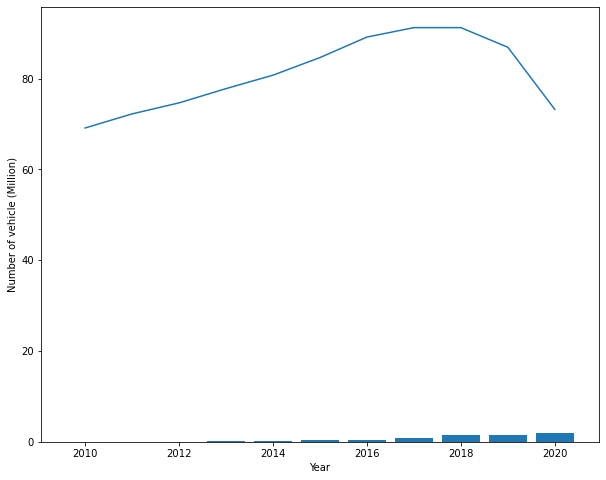

In [9]:
x_axis = totalvGLB_df["Year"]
plt.figure(figsize=(10,8))
plt.bar(x_axis, totalvGLB_df["EV sales"], align="center")
plt.plot(x_axis,totalvGLB_df["Car sales"])
plt.xlabel('Year')
plt.ylabel('Number of vehicle (Million)')
plt.show()


### Sales Comparison with Other Countries

In [181]:
totalvCHN_df = pd.read_csv(filepath + "China-2009-2020.csv")
totalvNET_df = pd.read_csv(filepath + "Netherlands-2010-2021.csv")
totalvNOR_df = pd.read_csv(filepath + "Norway-2009-2021.csv")
combined_df = pd.merge(totalvCHN_df,totalvNET_df, how="inner", on="Year")
combined_df = pd.merge(combined_df,totalvNOR_df, how="inner", on="Year")
combined_df = combined_df.rename(columns={"sales volume in China in 1000 units": "China",
                            "number of EVs_x":"Netherlands",
                            "number of EVs_y":"Norway"})
combined_df.head()

,Year,China,Netherlands,Norway
0,2010,1.09,122,0.36
1,2011,4.75,861,2.00
2,2012,9.64,828,3.90
3,2013,14.61,"2,619",7.90
4,2014,48.91,"2,911",18.00


In [182]:
# Remove commas from Netherlands colume and change type to float
combined_df["Netherlands"]=combined_df["Netherlands"].str.replace(',','')
combined_df["Netherlands"]=combined_df["Netherlands"].astype(float)

In [199]:
# min/max normalization
def minmax_normal(colume):
    normalized_colume = [(value-colume.min())/(colume.max()-colume.min()) for value in colume]
    return normalized_colume

# Z-score normalization
def z_normal(colume):
    normalized_colume = [(value-colume.mean())/colume.std() for value in colume]
    return normalized_colume

def changes(data_list):
    diff = [(figure - data_list[data_list.index(figure)-1])/figure for figure in data_list[1:]]
    return diff


In [131]:
def expfunc(x, a, b, c ):
    return a*np.exp(b *x) +c

def logfunc(x, a,b,c ):
    return a*np.log(b+x)+c

### Plot normalized increase rate of the EV sales

In [201]:
diff_df = pd.DataFrame({"China diff":changes(combined_df["China"].values.tolist()),
                       "Netherlands diff":changes(combined_df["Netherlands"].values.tolist()),
                       "Norway diff":changes(combined_df["Norway"].values.tolist())})

diff_df.head()

,China diff,Netherlands diff,Norway diff
0,0.770526,0.858304,0.820000
1,0.507261,-0.039855,0.487179
2,0.340178,0.683849,0.506329
3,0.701288,0.100309,0.561111
4,0.666644,0.088318,0.307692


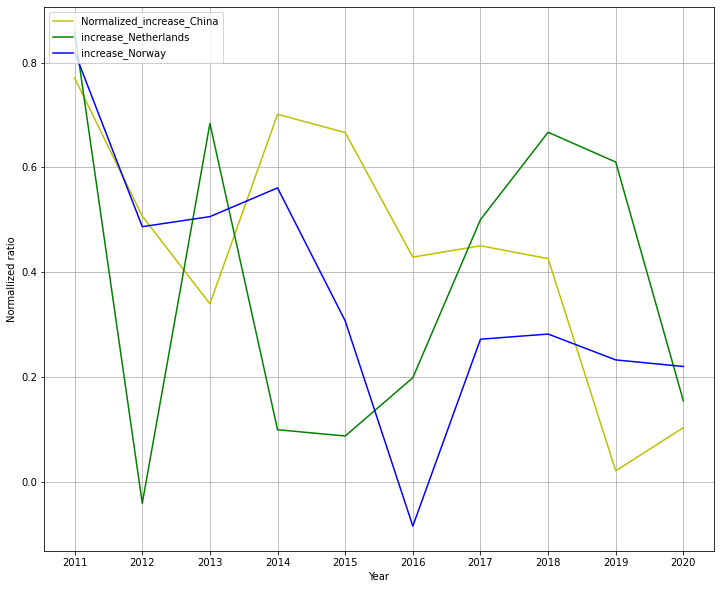

In [203]:
x = range(0,10)
x_aus = range(6,11)
x_fitted = np.linspace(np.min(x), np.max(x), 200)
x_fitted_aus = np.linspace(np.min(x_aus), np.max(x_aus), 200)
plt.figure(figsize=(12,10))

y1 = diff_df["China diff"]
plt.plot(x, y1, 'y-', label="Normalized_increase_China")
# popt, pcov = curve_fit(expfunc, x, y1, maxfev=100)
# y_fitted = expfunc(x_fitted, *popt)
# plt.plot(x_fitted, y_fitted, 'y--', label="China Fitted Curve")

y2 = diff_df["Netherlands diff"]
plt.plot(x, y2, 'g-', label="increase_Netherlands")
# popt, pcov = curve_fit(expfunc, x, y2, maxfev=100)
# y_fitted = expfunc(x_fitted, *popt)
# plt.plot(x_fitted, y_fitted, 'g--', label="Netherlands Fitted Curve")

y3 = diff_df["Norway diff"]
plt.plot(x, y3, 'b-', label="increase_Norway")
# popt, pcov = curve_fit(expfunc, x, y3, maxfev=100)
# y_fitted = expfunc(x_fitted, *popt)
# plt.plot(x_fitted, y_fitted, 'b--', label="Norway Fitted Curve")



# AUS Electric
# barchart_df = barchart_df.iloc[:5]
# y4 = z_normal(barchart_df["Electric"])
# popt, pcov = curve_fit(expfunc, x_aus, y4, maxfev=1000)
# plt.plot(x_aus, y4, 'ro', label="Electric")
# y_fitted = expfunc(x_fitted_aus, *popt)
# plt.plot(x_fitted_aus, y_fitted, 'r--', label="AU Fitted Curve")

plt.grid()
plt.xlabel('Year')
plt.ylabel('Normallized ratio')
plt.legend(loc="upper left")

tick_locations = [value for value in x]
plt.xticks(tick_locations,range(2011,2022))
plt.show()

### Plot normalized combined sales of EV in different countries

In [191]:
# Normalization of other countries
combined_df["normalized_China"] = z_normal(combined_df["China"])
combined_df["normalized_Netherlands"] = z_normal(combined_df["Netherlands"])
combined_df["normalized_Norway"] = z_normal(combined_df["Norway"])
combined_df.head()

,Year,China,Netherlands,Norway,normallized_China,normallized_Netherlands,normallized_Norway
0,2010,1.09,122.0,0.36,-0.854035,-0.625811,-1.064721
1,2011,4.75,861.0,2.00,-0.844267,-0.597479,-0.999433
2,2012,9.64,828.0,3.90,-0.831217,-0.598744,-0.923795
3,2013,14.61,2619.0,7.90,-0.817953,-0.530079,-0.764558
4,2014,48.91,2911.0,18.00,-0.726413,-0.518884,-0.362483


In [175]:
combined_df = combined_df[["Year","normalized_China","normalized_Netherlands","normalized_Norway"]]
combined_df = combined_df.set_index(["Year"])


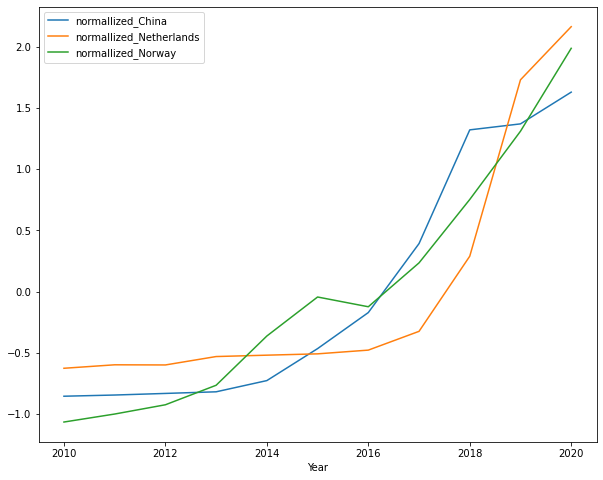

In [176]:
combined_df.plot(figsize=(10,8))


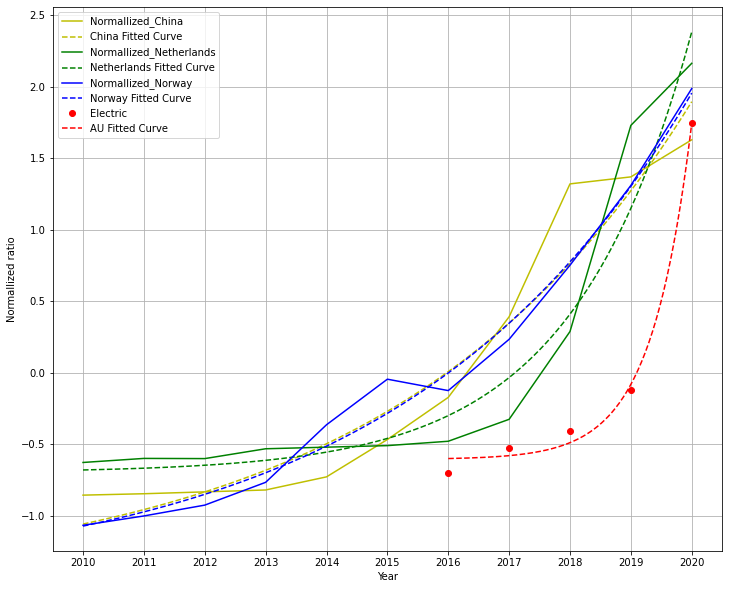

In [177]:
x = range(0,11)
x_aus = range(6,11)
x_fitted = np.linspace(np.min(x), np.max(x), 200)
x_fitted_aus = np.linspace(np.min(x_aus), np.max(x_aus), 200)
plt.figure(figsize=(12,10))

y1 = combined_df["normallized_China"]
plt.plot(x, y1, 'y-', label="Normalized_China")
popt, pcov = curve_fit(expfunc, x, y1, maxfev=100)
y_fitted = expfunc(x_fitted, *popt)
plt.plot(x_fitted, y_fitted, 'y--', label="China Fitted Curve")

y2 = combined_df["normallized_Netherlands"]
plt.plot(x, y2, 'g-', label="Normalized_Netherlands")
popt, pcov = curve_fit(expfunc, x, y2, maxfev=100)
y_fitted = expfunc(x_fitted, *popt)
plt.plot(x_fitted, y_fitted, 'g--', label="Netherlands Fitted Curve")

y3 = combined_df["normallized_Norway"]
plt.plot(x, y3, 'b-', label="Normalized_Norway")
popt, pcov = curve_fit(expfunc, x, y3, maxfev=100)
y_fitted = expfunc(x_fitted, *popt)
plt.plot(x_fitted, y_fitted, 'b--', label="Norway Fitted Curve")



# AUS Electric
barchart_df = barchart_df.iloc[:5]
y4 = z_normal(barchart_df["Electric"])
popt, pcov = curve_fit(expfunc, x_aus, y4, maxfev=1000)
plt.plot(x_aus, y4, 'ro', label="Electric")
y_fitted = expfunc(x_fitted_aus, *popt)
plt.plot(x_fitted_aus, y_fitted, 'r--', label="AU Fitted Curve")

plt.grid()
plt.xlabel('Year')
plt.ylabel('Normallized ratio')
plt.legend(loc="upper left")

tick_locations = [value for value in x]
plt.xticks(tick_locations,range(2010,2021))
plt.show()

In [178]:
y3

Year
2010   -1.064721
2011   -0.999433
2012   -0.923795
2013   -0.764558
2014   -0.362483
2015   -0.044007
2016   -0.123626
2017    0.234658
2018    0.752181
2019    1.309512
2020    1.986272
Name: normallized_Norway, dtype: float64